# sourmash: working with private collections of signatures

### Running this notebook.

You can run this notebook interactively via mybinder; click on this button:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dib-lab/sourmash/latest?filepath=doc%2Fsourmash-collections.ipynb)

A rendered version of this notebook is available at [sourmash.readthedocs.io](https://sourmash.readthedocs.io) under "Tutorials and notebooks".

You can also get this notebook from the [doc/ subdirectory of the sourmash github repository](https://github.com/dib-lab/sourmash/tree/latest/doc). See [binder/environment.yaml](https://github.com/dib-lab/sourmash/blob/latest/binder/environment.yml) for installation dependencies.

### What is this?

This is a Jupyter Notebook using Python 3. If you are running this via [binder](https://mybinder.org), you can use Shift-ENTER to run cells, and double click on code cells to edit them.

Contact: C. Titus Brown, ctbrown@ucdavis.edu. Please [file issues on GitHub](https://github.com/dib-lab/sourmash/issues/) if you have any questions or comments!

## download a bunch of genomes

In [1]:
!mkdir -p big_genomes
!curl -L https://osf.io/8uxj9/?action=download | (cd big_genomes && tar xzf -)

/Users/t/dev/sourmash/doc/big_genomes
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1017      0 --:--:-- --:--:-- --:--:--  1017
100 61.1M  100 61.1M    0     0  2932k      0  0:00:21  0:00:21 --:--:-- 3468k


## compute signatures for each file

In [2]:
!cd big_genomes/ && sourmash sketch dna -p k=31,scaled=1000 --name-from-first *.fa

/Users/t/dev/sourmash/doc/big_genomes

== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

computing signatures for files: 0.fa, 1.fa, 10.fa, 11.fa, 12.fa, 13.fa, 14.fa, 15.fa, 16.fa, 17.fa, 18.fa, 19.fa, 2.fa, 20.fa, 21.fa, 22.fa, 23.fa, 24.fa, 25.fa, 26.fa, 27.fa, 28.fa, 29.fa, 3.fa, 30.fa, 31.fa, 32.fa, 33.fa, 34.fa, 35.fa, 36.fa, 37.fa, 38.fa, 39.fa, 4.fa, 40.fa, 41.fa, 42.fa, 43.fa, 44.fa, 45.fa, 46.fa, 47.fa, 48.fa, 49.fa, 5.fa, 50.fa, 51.fa, 52.fa, 53.fa, 54.fa, 55.fa, 56.fa, 57.fa, 58.fa, 59.fa, 6.fa, 60.fa, 61.fa, 62.fa, 63.fa, 7.fa, 8.fa, 9.fa
Computing a total of 1 signature(s).
... reading sequences from 0.fa
calculated 1 signatures for 1 sequences in 0.fa
saved signature(s) to 0.fa.sig. Note: signature license is CC0.
... reading sequences from 1.fa
calculated 1 signatures for 1 sequences in 1.fa
saved signature(s) to 1.fa.sig. Note: signature license is CC0.
... reading sequences from 10.fa
calculated

calculated 1 signatures for 1 sequences in 53.fa
saved signature(s) to 53.fa.sig. Note: signature license is CC0.
... reading sequences from 54.fa
calculated 1 signatures for 1 sequences in 54.fa
saved signature(s) to 54.fa.sig. Note: signature license is CC0.
... reading sequences from 55.fa
calculated 1 signatures for 1 sequences in 55.fa
saved signature(s) to 55.fa.sig. Note: signature license is CC0.
... reading sequences from 56.fa
calculated 1 signatures for 1 sequences in 56.fa
saved signature(s) to 56.fa.sig. Note: signature license is CC0.
... reading sequences from 57.fa
calculated 1 signatures for 1 sequences in 57.fa
saved signature(s) to 57.fa.sig. Note: signature license is CC0.
... reading sequences from 58.fa
calculated 1 signatures for 30 sequences in 58.fa
saved signature(s) to 58.fa.sig. Note: signature license is CC0.
... reading sequences from 59.fa
calculated 1 signatures for 5 sequences in 59.fa
saved signature(s) to 59.fa.sig. Note: signature license is CC0.
...

## Compare them all

In [3]:
!sourmash compare big_genomes/*.sig -o compare_all.mat
!sourmash plot compare_all.mat


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 1 sigs from 'big_genomes/0.fa.sig'g'
loaded 1 sigs from 'big_genomes/1.fa.sig'g'
loaded 1 sigs from 'big_genomes/10.fa.sig'g'
loaded 1 sigs from 'big_genomes/11.fa.sig'g'
loaded 1 sigs from 'big_genomes/12.fa.sig'g'
loaded 1 sigs from 'big_genomes/13.fa.sig'g'
loaded 1 sigs from 'big_genomes/14.fa.sig'g'
loaded 1 sigs from 'big_genomes/15.fa.sig'g'
loaded 1 sigs from 'big_genomes/16.fa.sig'g'
loaded 1 sigs from 'big_genomes/17.fa.sig'10 sigs total
loaded 1 sigs from 'big_genomes/18.fa.sig'g'
loaded 1 sigs from 'big_genomes/19.fa.sig'g'
loaded 1 sigs from 'big_genomes/2.fa.sig'g'
loaded 1 sigs from 'big_genomes/20.fa.sig'g'
loaded 1 sigs from 'big_genomes/21.fa.sig'g'
loaded 1 sigs from 'big_genomes/22.fa.sig'g'
loaded 1 sigs from 'big_genomes/23.fa.sig'g'
loaded 1 sigs from 'big_genomes/24.fa.sig'g'
loaded 1 sigs from 'big_genomes/25.fa.sig'g'
loaded 1 sig

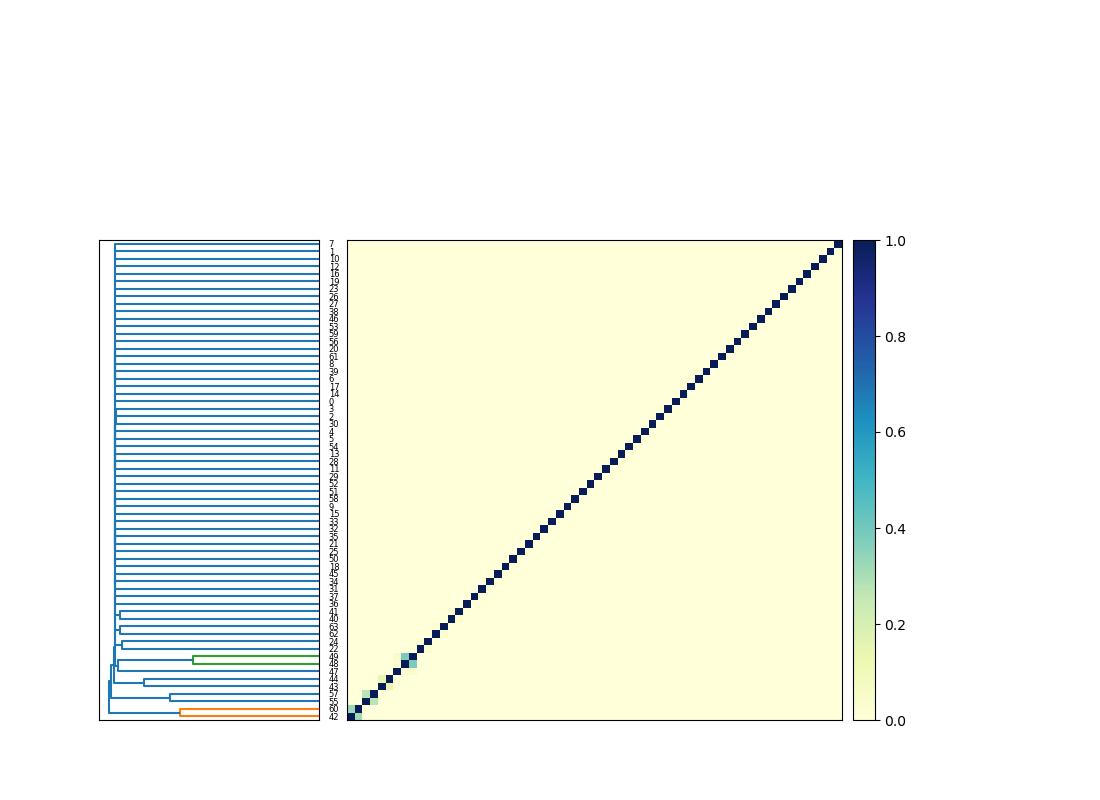

In [4]:
from IPython.display import Image
Image(filename='compare_all.mat.matrix.png') 

## make a fast(er) search database for all of them

In [5]:
!sourmash index -k 31 all-genomes big_genomes/*.sig


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loading 64 files into SBT
loaded 1 sigs from 'big_genomes/0.fa.sig'g'
loaded 1 sigs from 'big_genomes/1.fa.sig'g'
loaded 1 sigs from 'big_genomes/10.fa.sig'g'
loaded 1 sigs from 'big_genomes/11.fa.sig'g'
loaded 1 sigs from 'big_genomes/12.fa.sig'g'
loaded 1 sigs from 'big_genomes/13.fa.sig'g'
loaded 1 sigs from 'big_genomes/14.fa.sig'g'
loaded 1 sigs from 'big_genomes/15.fa.sig'g'
loaded 1 sigs from 'big_genomes/16.fa.sig'g'
loaded 1 sigs from 'big_genomes/17.fa.sig'10 sigs total
loaded 1 sigs from 'big_genomes/18.fa.sig'g'
loaded 1 sigs from 'big_genomes/19.fa.sig'g'
loaded 1 sigs from 'big_genomes/2.fa.sig'g'
loaded 1 sigs from 'big_genomes/20.fa.sig'g'
loaded 1 sigs from 'big_genomes/21.fa.sig'g'
loaded 1 sigs from 'big_genomes/22.fa.sig'g'
loaded 1 sigs from 'big_genomes/23.fa.sig'g'
loaded 1 sigs from 'big_genomes/24.fa.sig'g'
loaded 1 sigs from 'big_genomes

You can now use this to search, and gather.

In [6]:
!sourmash search shew_os185.fa.sig all-genomes --threshold=0.001


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

Cannot open file 'shew_os185.fa.sig'


In [7]:
# (make fake metagenome again, just in case)
!cat genomes/*.fa > fake-metagenome.fa
!rm -f fake-metagenome.fa.sig
!sourmash sketch dna -p k=31,scaled=1000 fake-metagenome.fa


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

computing signatures for files: fake-metagenome.fa
Computing a total of 1 signature(s).
... reading sequences from fake-metagenome.fa
calculated 1 signatures for 3 sequences in fake-metagenome.fa
saved signature(s) to fake-metagenome.fa.sig. Note: signature license is CC0.


In [8]:
!sourmash gather fake-metagenome.fa.sig all-genomes


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: fake-metagenome.fa... (k=31, DNA)
loaded 1 databases.                                                            


overlap     p_query p_match
---------   ------- -------
0.5 Mbp       42.2%   10.5%    NC_011663.1 Shewanella baltica OS223,...
499.0 kbp     38.4%   18.5%    CP001071.1 Akkermansia muciniphila AT...
0.5 Mbp       19.4%    4.9%    NC_009665.1 Shewanella baltica OS185,...

found 3 matches total;
the recovered matches hit 100.0% of the query



## build a database with taxonomic information --

for this, we need to provide a metadata file that contains accession => tax information.

In [9]:
import pandas
df = pandas.read_csv('podar-lineage.csv')
df

,accession,taxid,superkingdom,phylum,class,order,family,genus,species,strain
0,AE000782,224325,Archaea,Euryarchaeota,Archaeoglobi,Archaeoglobales,Archaeoglobaceae,Archaeoglobus,Archaeoglobus fulgidus,Archaeoglobus fulgidus DSM 4304
1,NC_000909,243232,Archaea,Euryarchaeota,Methanococci,Methanococcales,Methanocaldococcaceae,Methanocaldococcus,Methanocaldococcus jannaschii,Methanocaldococcus jannaschii DSM 2661
2,NC_003272,103690,Bacteria,Cyanobacteria,NaN,Nostocales,Nostocaceae,Nostoc,Nostoc sp. PCC 7120,NaN
3,AE009441,178306,Archaea,Crenarchaeota,Thermoprotei,Thermoproteales,Thermoproteaceae,Pyrobaculum,Pyrobaculum aerophilum,Pyrobaculum aerophilum str. IM2
4,AE009950,186497,Archaea,Euryarchaeota,Thermococci,Thermococcales,Thermococcaceae,Pyrococcus,Pyrococcus furiosus,Pyrococcus furiosus DSM 3638
...,...,...,...,...,...,...,...,...,...,...
59,NZ_ABZS01000228,432331,Bacteria,Aquificae,Aquificae,Aquificales,Hydrogenothermaceae,Sulfurihydrogenibium,Sulfurihydrogenibium yellowstonense,Sulfurihydrogenibium yellowstonense SS-5
60,NZ_JGWU01000001,1458259,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Bordetella,Bordetella bronchiseptica,Bordetella bronchiseptica D989
61,NZ_FWDH01000003,31899,Bacteria,Firmicutes,Clostridia,Thermoanaerobacterales,Thermoanaerobacterales Family III. Incertae Sedis,Caldicellulosiruptor,Caldicellulosiruptor bescii,NaN
62,NC_009972,316274,Bacteria,Chloroflexi,Chloroflexia,Herpetosiphonales,Herpetosiphonaceae,Herpetosiphon,Herpetosiphon aurantiacus,Herpetosiphon aurantiacus DSM 785


In [10]:
!sourmash lca index podar-lineage.csv taxdb big_genomes/*.sig  -C 3 --split-identifiers


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

Building LCA database with ksize=31 scaled=10000 moltype=DNA.
examining spreadsheet headers...
** assuming column 'accession' is identifiers in spreadsheet
64 distinct identities in spreadsheet out of 64 rows.
64 distinct lineages in spreadsheet out of 64 rows.
... loaded 64 signatures.H01000003.1 Caldicellulo (64 of 64); skipped 0 so far
loaded 19993 hashes at ksize=31 scaled=10000
64 assigned lineages out of 64 distinct lineages in spreadsheet.
64 identifiers used out of 64 distinct identifiers in spreadsheet.
saving to LCA DB: taxdb.lca.json


This database 'taxdb.lca.json' can be used for search and gather as above:

In [11]:
!sourmash gather fake-metagenome.fa.sig taxdb.lca.json


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: fake-metagenome.fa... (k=31, DNA)
loaded 1 databases.


overlap     p_query p_match
---------   ------- -------
0.6 Mbp       46.7%   11.6%    NC_011663.1 Shewanella baltica OS223,...
0.5 Mbp       38.7%   19.3%    CP001071.1 Akkermansia muciniphila AT...
0.5 Mbp       14.6%    3.9%    NC_009665.1 Shewanella baltica OS185,...

found 3 matches total;
the recovered matches hit 100.0% of the query



...but can also be used for taxonomic summarization:

In [12]:
!sourmash lca summarize --query fake-metagenome.fa.sig --db taxdb.lca.json


== This is sourmash version 4.0.0a4.dev12+g31c5eda2. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 1 LCA databases. ksize=31, scaled=10000 moltype=DNA
finding query signatures...
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia;Akkermansia muciniphila;Akkermansia muciniphila ATCC BAA-835   fake-metagenome.fa.sig:4e1ac0cf fake-metagenome.fa
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia;Akkermansia muciniphila   fake-metagenome.fa.sig:4e1ac0cf fake-metagenome.fa
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia   fake-metagenome.fa.sig:4e1ac0cf fake-metagenome.fa
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae   fake-metagenome.fa.sig:4e1ac0cf fake-metagenome.fa
38.7%    53   Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales   fake-metagenom

## Other pointers

[Sourmash: a practical guide](https://sourmash.readthedocs.io/en/latest/using-sourmash-a-guide.html)

[Classifying signatures taxonomically](https://sourmash.readthedocs.io/en/latest/classifying-signatures.html)

[Pre-built search databases](https://sourmash.readthedocs.io/en/latest/databases.html)

## A full list of notebooks

[An introduction to k-mers for genome comparison and analysis](kmers-and-minhash.ipynb)

[Some sourmash command line examples!](sourmash-examples.ipynb)

[Working with private collections of signatures.](sourmash-collections.ipynb)

[Using the LCA_Database API.](using-LCA-database-API.ipynb)
